In [ ]:
import jinja2
from pycaret.utils import check_metric
from pycaret.classification import *
from pycaret.regression import *

data=pd.read_csv("/content/drive/MyDrive/Smart Farm/Data/smart_farm_final.csv")

In [ ]:
train_data=pd.read_csv("/content/drive/MyDrive/Smart Farm/Data/smart_farm_final_dummied_train.csv")
test_data=pd.read_csv("/content/drive/MyDrive/Smart Farm/Data/smart_farm_final_dummied_test.csv")
train_data.shape, test_data.shape

((100000, 80), (29448, 80))

In [ ]:
vif10=np.load('/content/drive/MyDrive/Smart Farm/Data/vif10.npy', allow_pickle=True)
vif10_forward=np.load('/content/drive/MyDrive/Smart Farm/Data/vif10_forward.npy', allow_pickle=True)
vif10_backward=np.load('/content/drive/MyDrive/Smart Farm/Data/vif10_backward.npy', allow_pickle=True)
vif10_stepwise=np.load('/content/drive/MyDrive/Smart Farm/Data/vif10_stepwise.npy', allow_pickle=True)
forward=np.load('/content/drive/MyDrive/Smart Farm/Data/forward.npy', allow_pickle=True)
backward=np.load('/content/drive/MyDrive/Smart Farm/Data/backward.npy', allow_pickle=True)
stepwise=np.load('/content/drive/MyDrive/Smart Farm/Data/stepwise.npy', allow_pickle=True)

In [ ]:
cols=[vif10, vif10_forward, vif10_backward, vif10_stepwise, forward, backward, stepwise]

In [ ]:
X_test = train_data.drop(['내부 온도'], axis=1)[cols[4]]
y_test = train_data['내부 온도']

X_val = test_data.drop(['내부 온도'], axis=1)[cols[4]]
y_val = test_data['내부 온도']

In [ ]:
def model_with_cols(columns):
        columns=np.append(columns, np.array(['내부 온도']))
        columns=columns[columns!='const']
        reg_lunch=setup(
                data=train_data[columns],
                target='내부 온도',
                train_size=0.8,
                imputation_type='simple',
                data_split_shuffle=False,
                normalize = False,
                normalize_method = 'zscore',
                fold_strategy = 'timeseries',
                fold = 5,
                verbose=True,
                silent= True,
                session_id=123)
        top3_model=compare_models(sort='RMSE',n_select=3,round=4,cross_validation=True,verbose=True,errors='ignore')
        return top3_model

In [ ]:
top3_model=model_with_cols(cols[4]) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3593,0.3114,0.5417,0.9776,0.0288,0.0195,0.814
gbr,Gradient Boosting Regressor,0.4000,0.3662,0.5891,0.9738,0.0310,0.0215,10.602
et,Extra Trees Regressor,0.4030,0.3940,0.5996,0.9714,0.0318,0.0219,19.712
rf,Random Forest Regressor,0.4059,0.4051,0.6130,0.9706,0.0324,0.0221,35.642
dt,Decision Tree Regressor,0.4993,0.5702,0.7340,0.9589,0.0382,0.0269,0.894
ada,AdaBoost Regressor,0.6082,0.6779,0.8082,0.9519,0.0426,0.0330,6.908
lr,Linear Regression,0.6597,0.8508,0.8985,0.9409,0.0467,0.0353,0.838
br,Bayesian Ridge,0.6734,0.9202,0.9253,0.9360,0.0484,0.0360,0.200
ridge,Ridge Regression,0.6890,0.9561,0.9413,0.9336,0.0492,0.0368,0.058
omp,Orthogonal Matching Pursuit,0.6354,1.0135,0.9833,0.9299,0.0509,0.0342,0.066


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_es

In [ ]:
lightgbm_model=create_model('lightgbm',fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2910,0.1739,0.4170,0.9883,0.0191,0.0141
1,0.4700,0.6041,0.7773,0.9509,0.0417,0.0261
2,0.3789,0.2674,0.5171,0.9808,0.0274,0.0207
3,0.3025,0.1700,0.4123,0.9893,0.0211,0.0162
4,0.3544,0.3418,0.5846,0.9785,0.0345,0.0204
Mean,0.3593,0.3114,0.5417,0.9776,0.0288,0.0195
Std,0.0641,0.1597,0.1343,0.0140,0.0084,0.0041


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


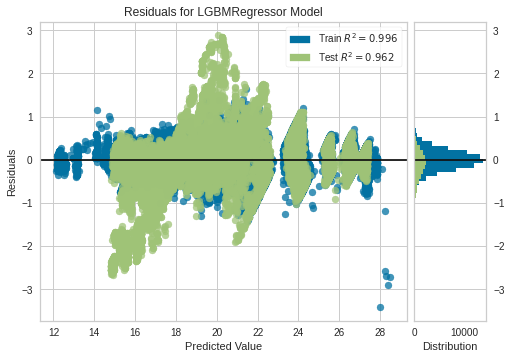

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(lightgbm_model)

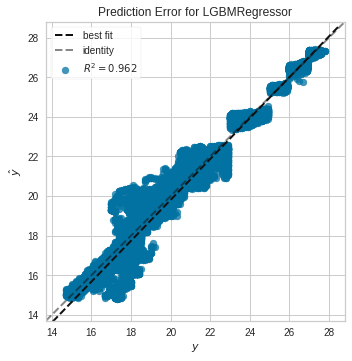

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(lightgbm_model, plot = 'error')

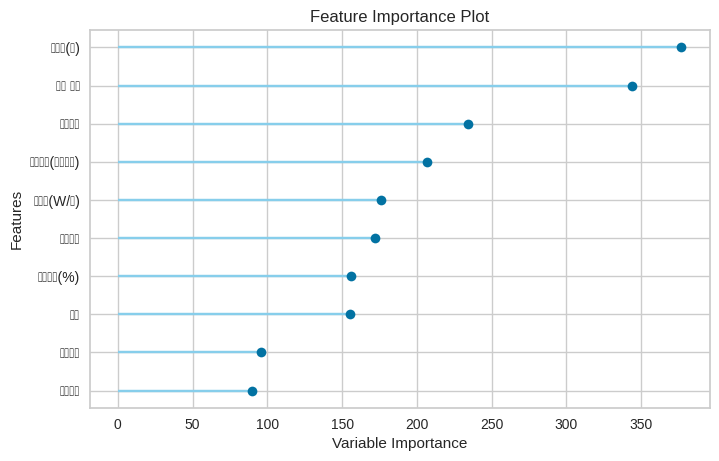

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(lightgbm_model, plot = 'feature')

In [ ]:
pred_holdout = predict_model(lightgbm_model)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.4756,0.5277,0.7264,0.962,0.0392,0.0254


In [ ]:
check_metric(pred_holdout['내부 온도'], pred_holdout['Label'], metric='RMSE')

0.7264

In [ ]:
cols[4]

array(['차열스크린_온도조절_23도미만', '난방온도(설정온도)', '외기온(℃)', '일사량(W/㎡)',
       '차열스크린_온도조절_23도~25도', '환기온도(천창 제어온도)_27', '에너지스크린(수직)', '내부 습도',
       '차열스크린_개방조절_100%개방', '차열스크린_온도조절_25도~26도', '시간범주_야간', '열공급량(kWh)',
       '일출3시간후', '배기팬_0', '일몰시간', '일몰전후_일몰1시간반_전', '에너지스크린(수평)',
       '차광스크린(수평)', '일몰1시간반전', 'PM10등급_좋음', '환기온도(천창 제어온도)_28',
       '차광스크린_개방_0', '천창', 'PM25_1시간', 'PM10_1시간', '누적강수량', '해면기압',
       '현지기압', 'PM25등급_보통', '아황산가스_1시간', '지면온도', '오존_1시간', '팬코일 B동_1.0',
       '오존등급_좋음', '이산화질소_1시간', '일조', '풍속(m/s)', '년도', '일산화탄소_1시간',
       'PM10등급_나쁨', '시간범주_주간', '풍향(º)', '외기습도(%)', '이산화질소등급_나쁨', '유동팬_0',
       '차열스크린_개방조절_0%~30%개방', '아황산가스등급_좋음', '하루길이',
       '차광스크린_개방조절_80%~100%개방', 'PM25등급_나쁨', '일출일몰_일몰', '차열스크린(수평)',
       '차열스크린_개방조절_70%~100%개방', '일출시간', 'const'], dtype=object)

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Smart Farm/Data/smart_farm_final.csv")
test_data.index=data['시간'][100000:129448]

1. test_data size 한 개로 줄여서 넣을 수 있는지 보기

In [ ]:
def create_time_steps(length):
    return list(range(-length, 0))

In [ ]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0
        
    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

# Pseudo

In [ ]:
# 양의 효과
def effect_plus():
    """
    배기팬, 유동팬, 천창: 0(정지)
    팬코일: 1(작동)
    차광스크린: 0%(감소)
    차열스크린: 0%(감소)
    에너지스크린(수평): 0%(감소)
    에너지스크린(수직): 0%(감소)

    """
    #print("작동: 양의 방향")
    #print("------------------------")
    return [0, 0, 0, 1, 0, 0, 0, 0]

# 음의 효과
def effect_minus():
    """
    배기팬, 유동팬, 천창: 1(작동)
    팬코일: 0(정지)
    차광스크린: 100%(증가)
    차열스크린: 100%(증가)
    에너지스크린(수평): 100%(증가)
    에너지스크린(수직): 100%(증가)

    """
    #print("작동: 음의 방향")
    #print("------------------------")
    return [1, 1, 1, 0, 100, 100, 100, 100]
    

In [ ]:
# 예측값에 의한 작동
def manipulate(curr_temps, pred_temps, max_thres, min_thres, RRS):
    # 온도 차
    temp_diff = pred_temp - curr_temps
    
    # RRS 적용 시 
    ## temp_diff*=RRS
    
    # 최소 온도 > 예측 온도 : 상승
    if (min_thres > pred_temp):
        #print("현재 온도: %d\n예측 온도: %d\n최대 온도: %d\n최소 온도: %d"%(curr_temps, pred_temp, max_thres, min_thres))
        return effect_plus()
    
    # 최대 온도 > 예측 온도 > 최소 온도: 유지
    elif (max_thres > pred_temp) and (pred_temp > min_thres):
        #print("현재 온도: %d\n예측 온도: %d\n최대 온도: %d\n최소 온도: %d"%(curr_temps, pred_temp, max_thres, min_thres))
        #print("작동 정지: 온도가 적정 범위 내에 있음")
        #print("------------------------")
        return [-1, -1, -1, -1, -1, -1, -1, -1 ]

    # 예측 온도 > 최대 온도: 하강
    elif (pred_temp > max_thres):
        #print("현재 온도: %d\n예측 온도: %d\n최대 온도: %d\n최소 온도: %d"%(curr_temps, pred_temp, max_thres, min_thres))
        return effect_minus()

    # elif 에러에러 하나 있음, 처리 필요
    else: 
        #print("현재 온도: %d\n예측 온도: %d\n최대 온도: %d\n최소 온도: %d"%(curr_temps, pred_temp, max_thres, min_thres))
        #print("에러에러")
        return [-1, -1, -1, -1, -1, -1, -1, -1 ]

In [ ]:
import pandas as pd
from keras.models import Sequential, load_model

RRS = 0.7

In [ ]:
# demonstrate prediction
X_plot=X_val
y_plot=y_val
y_predict=[]


In [ ]:
pred_holdout = predict_model(lightgbm_model, data=pd.concat([test_data[cols[4]], y_val], axis=1))

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.1385,3.3288,1.8245,0.8429,0.1166,0.0715


In [ ]:
check_metric(pred_holdout['내부 온도'], pred_holdout['Label'], metric='RMSE')

1.8245

In [ ]:
X_plot.columns

Index(['차열스크린_온도조절_23도미만', '난방온도(설정온도)', '외기온(℃)', '일사량(W/㎡)',
       '차열스크린_온도조절_23도~25도', '환기온도(천창 제어온도)_27', '에너지스크린(수직)', '내부 습도',
       '차열스크린_개방조절_100%개방', '차열스크린_온도조절_25도~26도', '시간범주_야간', '열공급량(kWh)',
       '일출3시간후', '배기팬_0', '일몰시간', '일몰전후_일몰1시간반_전', '에너지스크린(수평)', '차광스크린(수평)',
       '일몰1시간반전', 'PM10등급_좋음', '환기온도(천창 제어온도)_28', '차광스크린_개방_0', '천창',
       'PM25_1시간', 'PM10_1시간', '누적강수량', '해면기압', '현지기압', 'PM25등급_보통',
       '아황산가스_1시간', '지면온도', '오존_1시간', '팬코일 B동_1.0', '오존등급_좋음', '이산화질소_1시간',
       '일조', '풍속(m/s)', '년도', '일산화탄소_1시간', 'PM10등급_나쁨', '시간범주_주간', '풍향(º)',
       '외기습도(%)', '이산화질소등급_나쁨', '유동팬_0', '차열스크린_개방조절_0%~30%개방', '아황산가스등급_좋음',
       '하루길이', '차광스크린_개방조절_80%~100%개방', 'PM25등급_나쁨', '일출일몰_일몰', '차열스크린(수평)',
       '차열스크린_개방조절_70%~100%개방', '일출시간', 'const'],
      dtype='object')

In [ ]:
# 모델의 예측값
# yhat_list = [16, 17, 18, 19, 20, 21, 29, 30, 29, 25 ]

for i in range(1, len(X_plot)):
    # 하나씩 넣어야함(매차례 변동)
    # yhat = model.predict(x_test)
    yhat=predict_model(lightgbm_model, data=X_plot[i:i+1])['Label'].iloc[0]
    y_predict.append(yhat)
    curr_temp = y_test[i-1]
    pred_temp = yhat
    if X_plot['환기온도(천창 제어온도)_27'][i-1]==1:
      max_thres=27
    elif X_plot['환기온도(천창 제어온도)_28'][i-1]==1:
      max_thres=28
    else:
      max_thres=30
    #max_thres = X_plot['환기온도(천창 제어온도)'][i-1]
    min_thres = X_plot['난방온도(설정온도)'][i-1]
    a, b, c, d, e, f, g, h = manipulate(curr_temp, pred_temp, max_thres, min_thres, RRS)
    if a != -1:
        X_plot['배기팬_0'][i], X_plot['유동팬_0'][i], X_plot['천창'][i], X_plot['팬코일 B동_1.0'][i], X_plot['차광스크린(수평)'][i], X_plot['차열스크린(수평)'][i], X_plot['에너지스크린(수평)'][i], X_plot['에너지스크린(수직)'][i]  = a, b, c, d, e, f, g, h


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              

In [ ]:
X_plot.head(10)

,차열스크린_온도조절_23도미만,난방온도(설정온도),외기온(℃),일사량(W/㎡),차열스크린_온도조절_23도~25도,환기온도(천창 제어온도)_27,에너지스크린(수직),내부 습도,차열스크린_개방조절_100%개방,차열스크린_온도조절_25도~26도,...,차열스크린_개방조절_0%~30%개방,아황산가스등급_좋음,하루길이,차광스크린_개방조절_80%~100%개방,PM25등급_나쁨,일출일몰_일몰,차열스크린(수평),차열스크린_개방조절_70%~100%개방,일출시간,const
0,1,18.0,0.7,0.0,0,0,0,74.3,0,0,...,1,1,1042,0,0,1,0,0,721,1.0
1,1,18.0,0.7,0.0,0,0,0,72.9,0,0,...,1,1,1042,0,0,1,0,0,721,1.0
2,1,18.0,0.7,0.0,0,0,0,76.2,0,0,...,1,1,1042,0,0,1,0,0,721,1.0
3,1,18.0,0.7,0.0,0,0,0,75.5,0,0,...,1,1,1042,0,0,1,0,0,721,1.0
4,1,18.0,0.7,0.0,0,0,0,75.6,0,0,...,1,1,1042,0,0,1,0,0,721,1.0
5,1,18.0,0.7,0.0,0,0,0,76.5,0,0,...,1,1,1042,0,0,1,0,0,721,1.0
6,1,18.0,0.7,0.0,0,0,0,74.8,0,0,...,1,1,1042,0,0,1,0,0,721,1.0
7,1,18.0,0.7,0.0,0,0,0,74.3,0,0,...,1,1,1042,0,0,1,0,0,721,1.0
8,1,18.0,0.7,0.0,0,0,0,74.0,0,0,...,1,1,1042,0,0,1,0,0,721,1.0
9,1,18.0,0.7,0.0,0,0,0,74.3,0,0,...,1,1,1042,0,0,1,0,0,721,1.0


In [ ]:
test_data[cols[4]].head(10)

,차열스크린_온도조절_23도미만,난방온도(설정온도),외기온(℃),일사량(W/㎡),차열스크린_온도조절_23도~25도,환기온도(천창 제어온도)_27,에너지스크린(수직),내부 습도,차열스크린_개방조절_100%개방,차열스크린_온도조절_25도~26도,...,차열스크린_개방조절_0%~30%개방,아황산가스등급_좋음,하루길이,차광스크린_개방조절_80%~100%개방,PM25등급_나쁨,일출일몰_일몰,차열스크린(수평),차열스크린_개방조절_70%~100%개방,일출시간,const
0,1,18.0,0.7,0.0,0,0,0,74.3,0,0,...,1,1,1042,0,0,1,0,0,721,1.0
1,1,18.0,0.7,0.0,0,0,0,72.9,0,0,...,1,1,1042,0,0,1,0,0,721,1.0
2,1,18.0,0.7,0.0,0,0,0,76.2,0,0,...,1,1,1042,0,0,1,0,0,721,1.0
3,1,18.0,0.7,0.0,0,0,0,75.5,0,0,...,1,1,1042,0,0,1,0,0,721,1.0
4,1,18.0,0.7,0.0,0,0,0,75.6,0,0,...,1,1,1042,0,0,1,0,0,721,1.0
5,1,18.0,0.7,0.0,0,0,0,76.5,0,0,...,1,1,1042,0,0,1,0,0,721,1.0
6,1,18.0,0.7,0.0,0,0,0,74.8,0,0,...,1,1,1042,0,0,1,0,0,721,1.0
7,1,18.0,0.7,0.0,0,0,0,74.3,0,0,...,1,1,1042,0,0,1,0,0,721,1.0
8,1,18.0,0.7,0.0,0,0,0,74.0,0,0,...,1,1,1042,0,0,1,0,0,721,1.0
9,1,18.0,0.7,0.0,0,0,0,74.3,0,0,...,1,1,1042,0,0,1,0,0,721,1.0


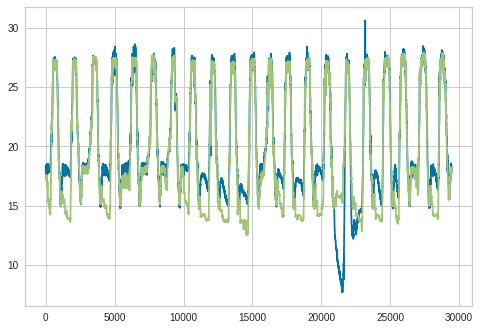

In [ ]:
plt.plot(y_plot)
plt.plot(y_predict)
plt.show()

In [ ]:
yhat_arr = np.array(y_predict)
np.save('/content/drive/MyDrive/Smart Farm/Data/yhat_arr.npy',yhat_arr)

# SHAP


In [ ]:
feats=lightgbm_model.feature_name_

X_val = test_data.drop(['내부 온도'], axis=1)
y_val = test_data['내부 온도']
# 일출3시간후, 현지기압 사라짐.. 어데감..
# 뭔가 다 이상해져서.. rename... ㅜㅜ
X_val.rename(columns={'내부 습도':'내부_습도', '차열스크린_온도조절_23도미만':'차열스크린_온도조절_23도미만_1', '차열스크린_온도조절_23도~25도':'차열스크린_온도조절_23도~25도_0', '환기온도(천창 제어온도)_27':'환기온도(천창_제어온도)_27_1', 
                      '차열스크린_개방조절_100%개방':'차열스크린_개방조절_100%개방_0', '차열스크린_온도조절_25도~26도':'차열스크린_온도조절_25도~26도_0', '시간범주_야간':'시간범주_야간_0', '배기팬_0':'배기팬_0_1', '년도':'년도_2021',
                      '일몰전후_일몰1시간반_전':'일몰전후_일몰1시간반_전_0', 'PM10등급_좋음':'PM10등급_좋음_1', '환기온도(천창 제어온도)_28':'환기온도(천창_제어온도)_28_1', '차광스크린_개방_0':'차광스크린_개방_0_0', 'PM25등급_보통':'PM25등급_보통_1', 
                      '팬코일 B동_1.0':'팬코일_B동_1.0_0', '오존등급_좋음':'오존등급_좋음_1', 'PM10등급_나쁨':'PM10등급_나쁨_1', '시간범주_주간':'시간범주_주간_0', '이산화질소등급_나쁨':'이산화질소등급_나쁨_1', '유동팬_0':'유동팬_0_1', '차열스크린_개방조절_0%~30%개방':'차열스크린_개방조절_0%~30%개방_1', 
                      '아황산가스등급_좋음':'아황산가스등급_좋음_1', '차광스크린_개방조절_80%~100%개방':'차광스크린_개방조절_80%~100%개방_0', 'PM25등급_나쁨':'PM25등급_나쁨_1', '일출일몰_일몰':'일출일몰_일몰_0', '차열스크린_개방조절_70%~100%개방':'차열스크린_개방조절_70%~100%개방_0'}
                   , inplace=True)

In [ ]:
for i in range(len(X_val['년도_2021'])):
    if X_val['년도_2021'][i]==2022:
        X_val['년도_2021'][i]=0
    else:
        X_val['년도_2021'][i]=1

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap  # package used to calculate Shap values


# data_for_prediction = np.array()  # use 1 row of data here. Could use multiple rows if desired
# data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

# Create object that can calculate shap values
k_explainer = shap.Explainer(lightgbm_model) # Tree, Deep 있음

# Calculate Shap values
k_shap_values = k_explainer.shap_values(X_val[feats])

shap.force_plot(k_explainer.expected_value, k_shap_values)